In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
import matplotlib.pyplot as plt

## Preprocessing


In [3]:
df = pd.read_csv("./data/features_extracted/chime_frb_catalog_2021.csv")

pd.set_option("display.max_columns", None)
df.columns = df.columns.str.strip()

FEATURES = [
    "ra",
    # "dec",
    "snr_fitb",
    "log_dm_exc_ymw16",
    # "log_dm_exc_ne2001",
    "log_bc_width",
    "log_flux",
    "log_fluence",
    "sp_idx",
    "sp_run",
    "log_in_duration",
    "log_peak_freq",
    "log_fre_width",
    "log_T_B",
    "log_energy",
    "log_luminosity",
]
FEATURE_LABELS = [
    "Right Ascension",
    # "Declination",  # CHIME reports that source density is high due to the long exposure near the North Celestial Pole, so repeater identification is more difficult at higher declinations than lower ones
    "SNR (fitburst)",
    "Excess DM (YMW16)",
    # "Excess DM (NE2001)",  # We choose YMW16 instead of NE2001
    "Boxcar width",
    "Flux",
    "Fluence",
    "Spectral index",
    "Spectral running",
    "Rest-frame width",
    "Peak frequency",
    "Frequency width",
    "Brightness temperature",
    "Burst energy",
    "Luminosity",  # Correlated to burst energy and excess DM
]
X = df[FEATURES]
y = df["is_repeater"]

df

,tns_name,previous_name,repeater_name,ra,dec,gl,gb,exp_up,exp_low,bonsai_snr,bonsai_dm,snr_fitb,dm_fitb,dm_exc_ne2001,dm_exc_ymw16,bc_width,scat_time,flux,fluence,sub_num,width_fitb,sp_idx,sp_run,high_freq,low_freq,peak_freq,chi_sq,dof,flag_frac,excluded_flag,previous_rp_name,is_repeater,redshift,fre_width,fre_width_ob,in_duration,energy,luminosity,T_B,log_dm_fitb,log_bonsai_dm,log_dm_exc_ne2001,log_dm_exc_ymw16,log_bc_width,log_scat_time,log_flux,log_fluence,log_width_fitb,log_high_freq,log_low_freq,log_peak_freq,log_fre_width,log_redshift,log_in_duration,log_energy,log_luminosity,log_T_B
0,FRB20180725A,180725.J0613+67,-9999,93.42,67.07,147.29,21.29,30.0,-9999.0,19.2,716.6,33.2,715.80930,644.2,635.4,0.00295,0.001100,1.70,4.10,0,0.000296,38.20,-45.80,760.1,485.3,607.4,371857.954,371481,0.403,1,-9999,0,0.640740,450.875425,274.8,0.180406,2.827944e+40,1.923870e+43,5.515622e+35,2.854797,2.855277,2.809021,2.803047,-2.530178,-2.958607,0.230449,0.612784,-3.528708,2.880871,2.686010,2.783475,2.654057,-0.193318,-0.743748,40.451471,43.284176,35.741595
1,FRB20180727A,180727.J1311+26,-9999,197.72,26.42,24.76,85.60,10.4,-9999.0,10.4,642.1,12.2,642.13400,620.9,622.4,0.00295,0.001700,0.58,2.31,0,0.001390,3.80,-9.20,800.2,400.2,493.3,382969.318,381818,0.387,1,-9999,0,0.614818,645.927163,400.0,0.860778,1.189571e+40,4.823143e+42,2.622746e+35,2.807626,2.807603,2.793022,2.794070,-2.530178,-2.769551,-0.236572,0.363612,-2.856985,2.903199,2.602277,2.693111,2.810184,-0.211253,-0.065109,40.075391,42.683330,35.418756
2,FRB20180729A,180729.J1316+55,-9999,199.40,55.58,115.26,61.16,21.0,-9999.0,32.0,108.4,206.6,109.59418,78.8,86.8,0.00098,0.000157,11.70,17.00,0,0.000100,16.46,-30.21,692.7,400.2,525.6,264732.041,186953,0.399,1,-9999,0,0.002248,293.157605,292.5,0.099776,1.070358e+36,7.383140e+38,4.845901e+32,2.039787,2.035029,1.896526,1.938520,-3.008774,-3.802995,1.068186,1.230449,-4.000000,2.840545,2.602277,2.720655,2.467101,-2.648161,-1.000975,36.029529,38.868241,32.685375
3,FRB20180729B,180729.J0558+56,-9999,89.93,56.50,156.90,15.68,21.0,-9999.0,12.4,318.6,22.0,317.22350,223.2,198.8,0.00197,0.000660,0.92,1.20,0,0.000314,14.50,-14.60,800.2,441.8,657.5,425139.488,421337,0.323,1,-9999,0,0.157566,414.871625,358.4,0.271259,4.966122e+38,4.407270e+41,3.166148e+34,2.501365,2.503246,2.348694,2.298416,-2.705534,-3.180456,-0.036212,0.079181,-3.503070,2.903199,2.645226,2.817896,2.617914,-0.802538,-0.566616,38.696017,41.644170,34.500531
4,FRB20180730A,180730.J0353+87,-9999,57.39,87.19,125.11,25.11,270.0,214.0,69.5,849.2,89.8,848.90410,789.7,790.5,0.00492,0.002073,5.20,27.00,0,0.000468,4.27,-11.31,759.2,400.2,483.5,429165.844,417689,0.329,1,-9999,0,0.802405,647.063272,359.0,0.259653,2.335510e+41,8.107252e+43,1.508095e+36,2.928859,2.929010,2.897462,2.897902,-2.308035,-2.683401,0.716003,1.431364,-3.329754,2.880356,2.602277,2.684396,2.810947,-0.095607,-0.585606,41.368382,43.908874,36.178429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,-9999,-9999,277.47,59.04,88.29,25.72,23.0,-9999.0,12.1,635.7,14.6,637.09340,582.8,587.8,0.00197,0.000720,1.26,1.70,0,0.000608,-1.10,3.30,800.2,400.2,800.2,341779.300,341690,0.451,0,-9999,0,0.572362,628.944866,400.0,0.386679,1.226913e+40,1.429842e+43,4.195023e+35,2.804203,2.803252,2.765520,2.769230,-2.705534,-3.142668,0.100371,0.230449,-3.216096,2.903199,2.602277,2.903199,2.798613,-0.242329,-0.412649,40.088814,43.155288,35.622734
590,FRB20190701B,-9999,-9999,302.93,80.18,112.88,23.40,69.0,70.0,15.0,748.9,17.5,749.11400,687.6,688.1,0.00295,0.000340,1.10,1.90,0,0.000630,3.90,-11.80,732.8,400.2,471.5,329229.311,330137,0.470,0,-9999,0,0.688973,561.752466,332.6,0.373008,1.178856e+40,1.152717e+43,6.863375e+35,2.874548,2.874424,2.837336,2.837652,-2.530178,-3.468521,0.041393,0.278754,-3.200659,2.864985,2.602277,2.673482,2.749545,-0.161798,-0.428282,4

## Machine learning


In [4]:
from collections import Counter

import optuna
from optuna.samplers import TPESampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

from utils import get_subburst_preserved_train_test, lee_liu_score

In [5]:
np.random.seed(RANDOM_SEED)
# 1. We split the data into training and validation sets, but make sure that sub-bursts for a given burst are either all in the training set or all in the validation set
X_train, X_val, y_train, y_val = get_subburst_preserved_train_test(
    df, X, y, test_size=0.2, stratify=True
)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
y_train = pd.Series(y_train)
y_val = pd.Series(y_val)
print(f"{X_train.shape=} {y_train.shape=} {X_val.shape=} {y_val.shape=}")

# 2. We scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_scaled = scaler.transform(X)
print(f"{X_scaled.shape=}\n{X_train_scaled.shape=} {X_val_scaled.shape=}")

# 3. We oversample the training set to balance the classes
print(f"Before SMOTE: {Counter(y_train)}")
sm = SMOTE()
X_train_scaled_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)
print(f"{X_train_scaled_sm.shape=} {y_train_sm.shape=}")
print(f"After SMOTE: {Counter(y_train_sm)}")

X_train.shape=(477, 14) y_train.shape=(477,) X_val.shape=(117, 14) y_val.shape=(117,)
X_scaled.shape=(594, 14)
X_train_scaled.shape=(477, 14) X_val_scaled.shape=(117, 14)
Before SMOTE: Counter({0: 404, 1: 73})
X_train_scaled_sm.shape=(808, 14) y_train_sm.shape=(808,)
After SMOTE: Counter({0: 404, 1: 404})


In [6]:
NUM_TRIALS = 100
optimised_models = []
models_info = []

### Decision tree


In [ ]:
np.random.seed(RANDOM_SEED)
from sklearn.tree import DecisionTreeClassifier


def dt_objective(trial):
    np.random.seed(RANDOM_SEED)
    classifier_obj = DecisionTreeClassifier(
        min_samples_split=trial.suggest_int("min_samples_split", 2, 32),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 32),
        criterion=trial.suggest_categorical("criterion", ["gini", "entropy"]),
        random_state=RANDOM_SEED,
    )
    classifier_obj.fit(X_train_scaled_sm, y_train_sm)

    predictions = classifier_obj.predict(X_val_scaled)
    recall = recall_score(y_val, predictions)
    ll_score = lee_liu_score(y_val, predictions)

    return ll_score


sampler = TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(dt_objective, n_trials=NUM_TRIALS)
best_params = study.best_params
print(f"{best_params=}")

dt = DecisionTreeClassifier(**best_params, random_state=RANDOM_SEED)
dt.fit(X_train_scaled_sm, y_train_sm)
optimised_models.append(dt)
models_info.append(
    {"model": "Decision Tree", "params": best_params, "ll_score": study.best_value}
)

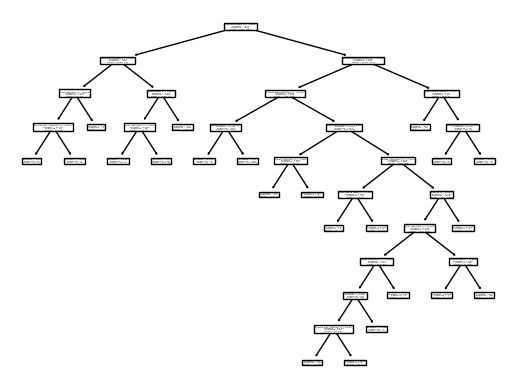

In [8]:
from sklearn import tree

tree.plot_tree(dt, feature_names=FEATURE_LABELS)
plt.savefig("out.svg")

### Random forest


In [ ]:
np.random.seed(RANDOM_SEED)
from sklearn.ensemble import RandomForestClassifier


def rf_objective(trial):
    np.random.seed(RANDOM_SEED)
    classifier_obj = RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 32),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 32),
        criterion=trial.suggest_categorical("criterion", ["gini", "entropy"]),
        random_state=RANDOM_SEED,
    )
    classifier_obj.fit(X_train_scaled_sm, y_train_sm)

    predictions = classifier_obj.predict(X_val_scaled)
    recall = recall_score(y_val, predictions)

    ll_score = lee_liu_score(y_val, predictions)

    return ll_score


sampler = TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(rf_objective, n_trials=NUM_TRIALS)
best_params = study.best_params
print(f"{best_params=}")
rf = RandomForestClassifier(**best_params, random_state=RANDOM_SEED)
rf.fit(X_train_scaled_sm, y_train_sm)
optimised_models.append(rf)
models_info.append(
    {"model": "Random Forest", "params": best_params, "ll_score": study.best_value}
)

### SVM


In [ ]:
np.random.seed(RANDOM_SEED)
from sklearn.svm import SVC


def svm_objective(trial):
    np.random.seed(RANDOM_SEED)
    classifier_obj = SVC(
        C=trial.suggest_float("C", 1e-2, 1e2, log=True),
        degree=trial.suggest_int("degree", 1, 8),
        kernel="linear",  # fix to linear so we can access coefficients later
        random_state=RANDOM_SEED,
    )

    classifier_obj.fit(X_train_scaled_sm, y_train_sm)

    predictions = classifier_obj.predict(X_val_scaled)
    recall = recall_score(y_val, predictions)

    ll_score = lee_liu_score(y_val, predictions)

    return ll_score


sampler = TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(svm_objective, n_trials=NUM_TRIALS)
best_params = study.best_params
print(f"{best_params=}")
svm = SVC(**best_params, kernel="linear", random_state=RANDOM_SEED)
svm.fit(X_train_scaled_sm, y_train_sm)
optimised_models.append(svm)
models_info.append(
    {"model": "SVM", "params": best_params, "ll_score": study.best_value}
)

### AdaBoost


In [ ]:
np.random.seed(RANDOM_SEED)
from sklearn.ensemble import AdaBoostClassifier


def adaboost_objective(trial):
    np.random.seed(RANDOM_SEED)
    classifier_obj = AdaBoostClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1),
        algorithm=trial.suggest_categorical("algorithm", ["SAMME", "SAMME.R"]),
        random_state=RANDOM_SEED,
    )
    classifier_obj.fit(X_train_scaled_sm, y_train_sm)

    predictions = classifier_obj.predict(X_val_scaled)
    recall = recall_score(y_val, predictions)

    ll_score = lee_liu_score(y_val, predictions)
    return ll_score


sampler = TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(adaboost_objective, n_trials=NUM_TRIALS)
best_params = study.best_params
print(f"{best_params=}")
adaboost = AdaBoostClassifier(**best_params, random_state=RANDOM_SEED)
adaboost.fit(X_train_scaled_sm, y_train_sm)
optimised_models.append(adaboost)
models_info.append(
    {"model": "AdaBoost", "params": best_params, "ll_score": study.best_value}
)

### LightGBM


In [ ]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
import warnings

np.random.seed(RANDOM_SEED)

warnings.filterwarnings("ignore")


def lgbm_objective(trial):
    np.random.seed(RANDOM_SEED)
    classifier_obj = LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1, log=True),
        subsample=trial.suggest_float("subsample", 0.1, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.1, 1.0),
        random_state=RANDOM_SEED,
        verbosity=-1,
    )

    classifier_obj.fit(X_train_scaled_sm, y_train_sm)

    predictions = classifier_obj.predict(X_val_scaled)
    recall = recall_score(y_val, predictions)
    ll_score = lee_liu_score(y_val, predictions)

    return ll_score


sampler = TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(lgbm_objective, n_trials=NUM_TRIALS)
best_params = study.best_params
print(f"{best_params=}")
lightgbm = LGBMClassifier(**best_params, random_state=RANDOM_SEED, verbosity=-1)
lightgbm.fit(X_train_scaled_sm, y_train_sm)
optimised_models.append(lightgbm)
models_info.append(
    {"model": "LGBM", "params": best_params, "ll_score": study.best_value}
)

### XGBoost


In [ ]:
import xgboost as xgb
import warnings

warnings.filterwarnings("ignore")

np.random.seed(RANDOM_SEED)


def xgb_objective(trial):
    np.random.seed(RANDOM_SEED)
    classifier_obj = xgb.XGBClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        eta=trial.suggest_float("eta", 1e-3, 1e1, log=True),
        gamma=trial.suggest_float("gamma", 1e-3, 1e1, log=True),
        min_child_weight=trial.suggest_float("min_child_weight", 1e-3, 1e1, log=True),
        max_delta_step=trial.suggest_float("max_delta_step", 1e-3, 1e1, log=True),
        max_leaves=trial.suggest_int("max_leaves", 2, 256),
        max_bin=trial.suggest_int("max_bin", 2, 256),
        subsample=trial.suggest_float("subsample", 0.1, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.1, 1.0),
        random_state=RANDOM_SEED,
    )
    classifier_obj.fit(X_train_scaled_sm, y_train_sm)

    predictions = classifier_obj.predict(X_val_scaled)
    recall = recall_score(y_val, predictions)
    ll_score = lee_liu_score(y_val, predictions)

    return ll_score


sampler = TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(xgb_objective, n_trials=NUM_TRIALS)
best_params = study.best_params
print(f"{best_params=}")
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train_scaled_sm, y_train_sm)
optimised_models.append(xgb_model)
models_info.append(
    {"model": "XGBoost", "params": best_params, "ll_score": study.best_value}
)

### Logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression

np.random.seed(RANDOM_SEED)


def lr_objective(trial):
    np.random.seed(RANDOM_SEED)
    classifier_obj = LogisticRegression(
        tol=trial.suggest_float("tol", 1e-5, 1e-3, log=True),
        C=trial.suggest_float("C", 1e-2, 1e2, log=True),
        solver=trial.suggest_categorical("solver", ["liblinear", "newton-cholesky"]),
        max_iter=trial.suggest_int("max_iter", 100, 500),
        random_state=RANDOM_SEED,
    )

    classifier_obj.fit(X_train_scaled_sm, y_train_sm)

    predictions = classifier_obj.predict(X_val_scaled)
    recall = recall_score(y_val, predictions)

    ll_score = lee_liu_score(y_val, predictions)
    return ll_score


sampler = TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(lr_objective, n_trials=NUM_TRIALS)
best_params = study.best_params
print(f"{best_params=}")
lr = LogisticRegression(**best_params)
lr.fit(X_train_scaled_sm, y_train_sm)
optimised_models.append(lr)
models_info.append(
    {
        "model": "Logistic Regression",
        "params": best_params,
        "ll_score": study.best_value,
    }
)

### LDA


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def lda_objective(trial):
    np.random.seed(RANDOM_SEED)
    classifier_obj = LinearDiscriminantAnalysis(
        solver=trial.suggest_categorical("solver", ["svd", "lsqr", "eigen"]),
        store_covariance=trial.suggest_categorical("store_covariance", [True, False]),
        tol=trial.suggest_float("tol", 1e-5, 1e-3, log=True),
    )

    classifier_obj.fit(X_train_scaled_sm, y_train_sm)

    predictions = classifier_obj.predict(X_val_scaled)
    recall = recall_score(y_val, predictions)

    ll_score = lee_liu_score(y_val, predictions)
    return ll_score


sampler = TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(lda_objective, n_trials=NUM_TRIALS)
best_params = study.best_params
print(f"{best_params=}")
lda = LinearDiscriminantAnalysis(**best_params)
lda.fit(X_train_scaled_sm, y_train_sm)
optimised_models.append(lda)
models_info.append(
    {
        "model": "LDA",
        "params": best_params,
        "ll_score": study.best_value,
    }
)

## Model Analysis


In [16]:
models_df = pd.DataFrame(models_info)
models_df.sort_values(by="ll_score", ascending=False)

,model,params,ll_score
5,XGBoost,"{'n_estimators': 484, 'eta': 3.655998010036417...",4.614020
4,LGBM,"{'n_estimators': 218, 'learning_rate': 0.71144...",4.560739
2,SVM,"{'C': 8.471801418819979, 'degree': 5}",4.333333
7,LDA,"{'solver': 'lsqr', 'store_covariance': True, '...",4.333333
6,Logistic Regression,"{'tol': 5.6115164153345e-05, 'C': 63.512210106...",4.178571
0,Decision Tree,"{'min_samples_split': 6, 'min_samples_leaf': 5...",4.164153
3,AdaBoost,"{'n_estimators': 87, 'learning_rate': 0.228441...",3.990646
1,Random Forest,"{'n_estimators': 218, 'min_samples_split': 31,...",3.737356


### Retraining


To be able to analyse the models with greater confidence, we retrain each of them with their ideal hyperparameters on randomized training sets a 1000 times


In [17]:
import time

np.random.seed(RANDOM_SEED)

models_fittimes = [[] for _ in range(len(optimised_models))]
models_recalls = [[] for _ in range(len(optimised_models))]
models_llscores = [[] for _ in range(len(optimised_models))]
models_frac_pos = [[] for _ in range(len(optimised_models))]

for j in range(1000):
    if j % 100 == 0:
        print(f"Trial {j}")
    X_train, X_val, y_train, y_val = get_subburst_preserved_train_test(
        df, X, y, test_size=0.2, stratify=True
    )
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_val = pd.DataFrame(X_val, columns=X.columns)
    y_train = pd.Series(y_train)
    y_val = pd.Series(y_val)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_scaled = scaler.transform(X)

    sm = SMOTE()
    X_train_scaled_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

    for i, model in enumerate(optimised_models):
        start = time.time()
        model.fit(X_train_scaled_sm, y_train_sm)
        end = time.time()
        models_fittimes[i].append(end - start)

        predictions = model.predict(X_val_scaled)
        recall = recall_score(y_val, predictions)
        ll_score = lee_liu_score(y_val, predictions)
        frac_pos = np.mean(predictions) # assumes they are either 0 or 1
        
        models_recalls[i].append(recall)
        models_llscores[i].append(ll_score)
        models_frac_pos[i].append(frac_pos)

Trial 0
Trial 100
Trial 200
Trial 300
Trial 400
Trial 500
Trial 600
Trial 700
Trial 800
Trial 900


In [18]:
models_recalls_mean = [np.mean(recalls) for recalls in models_recalls]
models_recalls_std = [np.std(recalls) for recalls in models_recalls]
models_llscores_mean = [np.mean(llscores) for llscores in models_llscores]
models_llscores_std = [np.std(llscores) for llscores in models_llscores]

models_fittimes_mean = [np.mean(fittimes) for fittimes in models_fittimes]
models_fittimes_std = [np.std(fittimes) for fittimes in models_fittimes]

models_df["recall_mean"] = models_recalls_mean
models_df["recall_std"] = models_recalls_std
models_df["llscore_mean"] = models_llscores_mean
models_df["llscore_std"] = models_llscores_std
models_df["fittime_mean"] = models_fittimes_mean
models_df["fittime_std"] = models_fittimes_std


models_df.sort_values("llscore_mean", ascending=False).sort_values(
    "recall_mean", ascending=False
)

,model,params,ll_score,recall_mean,recall_std,llscore_mean,llscore_std,fittime_mean,fittime_std
7,LDA,"{'solver': 'lsqr', 'store_covariance': True, '...",4.333333,0.872034,0.086674,3.781466,0.622762,0.000878,0.000072
2,SVM,"{'C': 8.471801418819979, 'degree': 5}",4.333333,0.866409,0.091162,3.606951,0.633397,0.013919,0.002870
6,Logistic Regression,"{'tol': 5.6115164153345e-05, 'C': 63.512210106...",4.178571,0.864806,0.090766,3.703701,0.642994,0.002272,0.000251
1,Random Forest,"{'n_estimators': 218, 'min_samples_split': 31,...",3.737356,0.835189,0.109198,3.489681,0.689725,0.163479,0.004491
3,AdaBoost,"{'n_estimators': 87, 'learning_rate': 0.228441...",3.990646,0.810861,0.111990,3.525678,0.724476,0.100380,0.003226
4,LGBM,"{'n_estimators': 218, 'learning_rate': 0.71144...",4.560739,0.780768,0.115691,3.705590,0.785445,0.104776,0.011756
5,XGBoost,"{'n_estimators': 484, 'eta': 3.655998010036417...",4.614020,0.779296,0.115402,3.713224,0.788410,1.095318,0.184028
0,Decision Tree,"{'min_samples_split': 6, 'min_samples_leaf': 5...",4.164153,0.741902,0.127052,3.155783,0.775187,0.003557,0.000289


In [26]:
sorted_models = models_df[
    (models_df["fittime_mean"] < 0.5) 
].sort_values("recall_mean", ascending=False)
NUM_SELECTED_MODELS = 3
TOP_MODEL_INDICES = list(sorted_models[:NUM_SELECTED_MODELS].index)
TOP_MODELS = [optimised_models[i] for i in TOP_MODEL_INDICES]
TOP_MODEL_NAMES = sorted_models["model"].values[:3]
# TOP_MODEL_PERM_IMPORTANCES = [models_df.iloc[i]['feature_importances_mean'] for i in TOP_MODEL_INDICES]
# print(f'{TOP_MODEL_INDICES=}\n{TOP_MODEL_NAMES=}\n{TOP_MODEL_PERM_IMPORTANCES=}')
sorted_models

,model,params,ll_score,recall_mean,recall_std,llscore_mean,llscore_std,fittime_mean,fittime_std
7,LDA,"{'solver': 'lsqr', 'store_covariance': True, '...",4.333333,0.872034,0.086674,3.781466,0.622762,0.000878,0.000072
2,SVM,"{'C': 8.471801418819979, 'degree': 5}",4.333333,0.866409,0.091162,3.606951,0.633397,0.013919,0.002870
6,Logistic Regression,"{'tol': 5.6115164153345e-05, 'C': 63.512210106...",4.178571,0.864806,0.090766,3.703701,0.642994,0.002272,0.000251
1,Random Forest,"{'n_estimators': 218, 'min_samples_split': 31,...",3.737356,0.835189,0.109198,3.489681,0.689725,0.163479,0.004491
3,AdaBoost,"{'n_estimators': 87, 'learning_rate': 0.228441...",3.990646,0.810861,0.111990,3.525678,0.724476,0.100380,0.003226
4,LGBM,"{'n_estimators': 218, 'learning_rate': 0.71144...",4.560739,0.780768,0.115691,3.705590,0.785445,0.104776,0.011756
0,Decision Tree,"{'min_samples_split': 6, 'min_samples_leaf': 5...",4.164153,0.741902,0.127052,3.155783,0.775187,0.003557,0.000289


#### Shapley coefficients


In [ ]:
import shap

np.random.seed(RANDOM_SEED)

explainers = []
shap_values = []
for top_model in TOP_MODELS:
    explainer = shap.Explainer(top_model.predict, X_val_scaled)
    explainer.feature_names = FEATURE_LABELS
    explainers.append(explainer)
    shap_values.append(explainer(X_val_scaled))

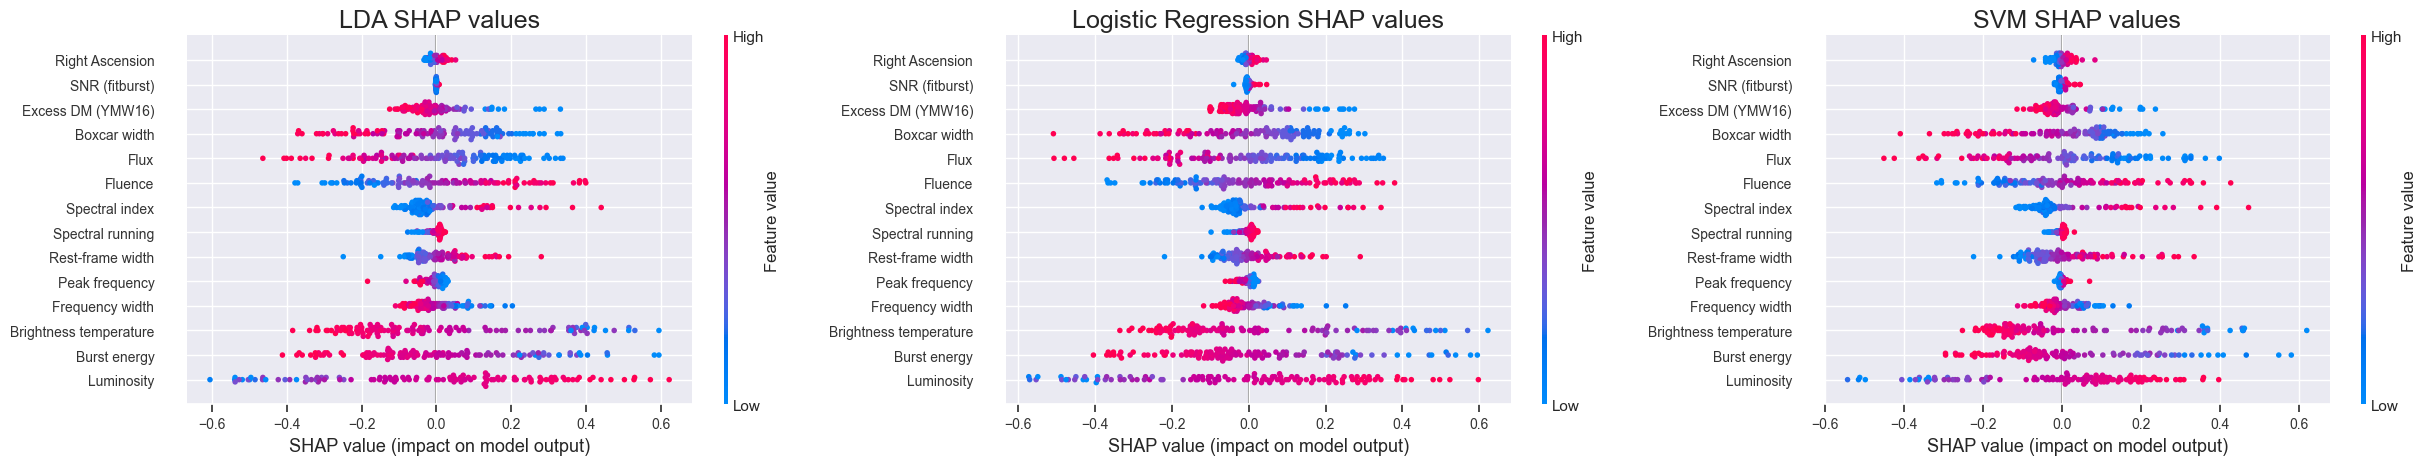

In [ ]:
plt.figure(figsize=(25, 5))
plt.subplots_adjust(wspace=0.5)

# We want it to be in a fixed order for ease of comparison
order = FEATURES
cols_nums = {col: i for i, col in enumerate(X.columns)}
order = list(map(cols_nums.get, order))

for i in range(NUM_SELECTED_MODELS):
    plt.subplot(1, NUM_SELECTED_MODELS, i + 1)
    shap.plots.beeswarm(
        shap_values[i],
        max_display=len(FEATURES),
        show=False,
        plot_size=None,
        order=order,
    )
    ax = plt.gca()
    # We change the fontsize of minor ticks label
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.tick_params(axis="both", which="minor", labelsize=8)
    ax.set_title(f"{TOP_MODEL_NAMES[i]} SHAP values")

plt.tight_layout()
plt.savefig(
    f"./figures/base_supervised/top_models_beeswarm.png", bbox_inches="tight", dpi=600
)

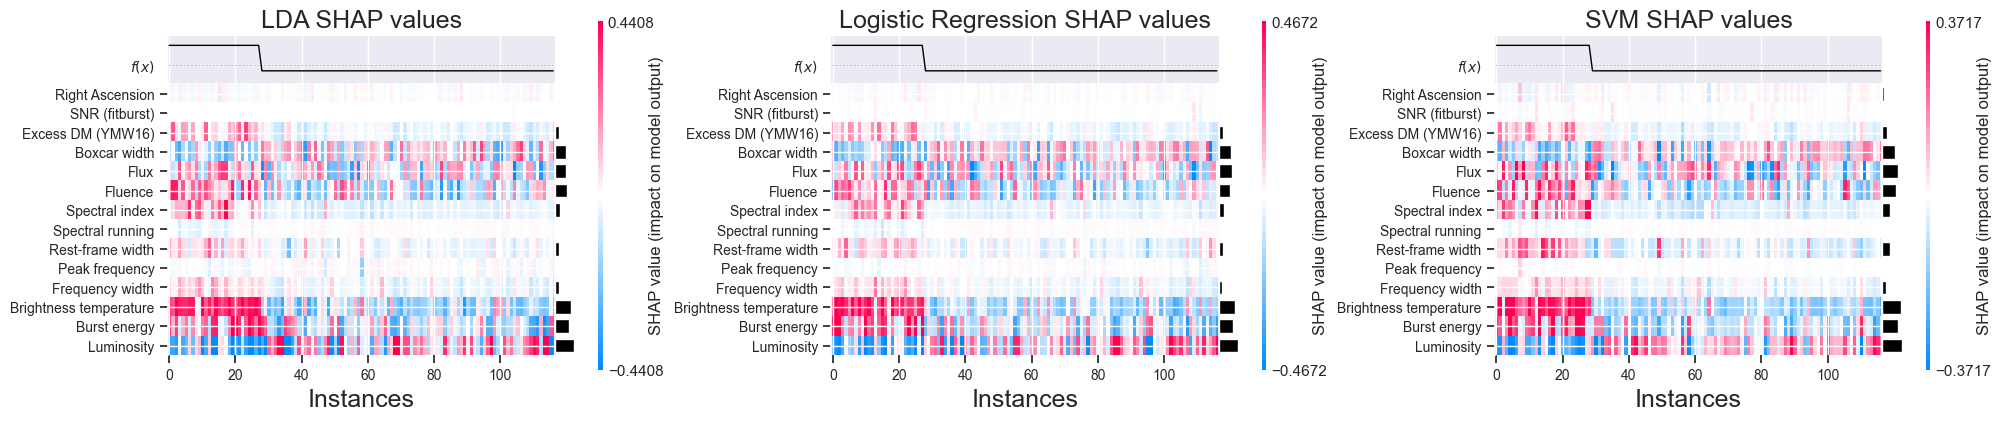

In [ ]:
plt.figure(figsize=(25, 5))
plt.subplots_adjust(wspace=0.5)

for i in range(NUM_SELECTED_MODELS):
    plt.subplot(1, NUM_SELECTED_MODELS, i + 1)
    shap.plots.heatmap(
        shap_values[i],
        max_display=len(FEATURES),
        show=False,
        plot_width=20,
        feature_order=order,
        instance_order=shap_values[i].sum(1),
    )
    plt.rc("font", size=6)
    ax = plt.gca()
    # We change the fontsize of minor ticks label
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.tick_params(axis="both", which="minor", labelsize=8)
    ax.set_title(f"{TOP_MODEL_NAMES[i]} SHAP values")

plt.tight_layout()
plt.savefig(
    f"./figures/base_supervised/top_models_heatmap.png", bbox_inches="tight", dpi=600
)